In [30]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
sns.set(style="darkgrid", palette="muted", color_codes=True)
sns.despine()

<Figure size 432x288 with 0 Axes>

In [31]:
def read_run_file(path):
    data = pd.read_json(path)
    data.columns = ['date', 'iteration', 'value']
    #TODO: convert times with time.gmtime(time.time())
    return data

In [61]:
def exp_average(arr, decay=0.9):
    running = arr[0]
    avg = np.zeros((len(arr)-1))
    for idx, val in enumerate(arr[:-1]):
        update = arr[idx+1]
        running = decay * running + (1-decay)*update
        avg[idx] = running
    return avg

def plt_training(plt, data, val_data, savefile=None, decay=0.962, color=None,title='', idx=0):
    loss = np.array(data['value'])
    avg_loss = exp_average(loss, decay)    
    if color is None:
        c = sns.color_palette()[idx]
    else:
        c = color
    
    scale = 100
    fig = plt.figure(0)
    plt.plot(data['iteration'],loss * scale,color=c + (0.2,) )
    plt.xlim([0,max(data['iteration'])])
    plt.ylim([0,max(loss)*scale])
    plt.plot(data['iteration'][:-1], avg_loss * scale,color=c, label='Trainingsset')
    plt.plot(val_data['iteration'], val_data['value'] * scale,color=sns.color_palette()[idx+1],label='Validierungset')
    plt.xlabel('Iteration')
    plt.ylabel('Fehler in %')
    plt.legend()
    plt.title(title)
    if savefile is not None:
        plt.savefig(savefile)
    return plt

In [62]:
plot_folder = Path('../../doc/figures/plot')
plot_folder.mkdir(exist_ok=True)
result_folder = Path('../../doc/results/')
run = '01522892733'
dataset_name = 'MNIST'

def run_file_paths(path, run):
    results = path / run['name']
    data_files = sorted(results.glob('*{}*'.format(run['id'])))
    return list(map(Path, data_files))

# data_files = run_file_paths(result_folder, run)
# plot_file = plot_folder / (data_files[0].stem + '.pdf')
# plot_file
# data_files

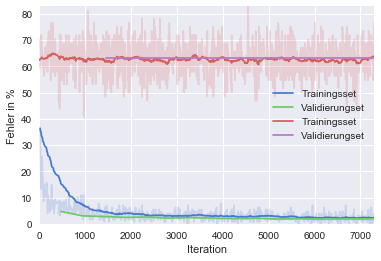

In [64]:
run_mnist = {'name': 'MNIST', 'id': '01522892733'}
run_diva = { 'name': 'DIVA', 'id': '01522891722'}
for idx, run in enumerate([run_mnist, run_diva]):
    train, val = list(map(read_run_file,run_file_paths(result_folder, run)))
    plt_training(plt,train, val,plot_file, idx=idx*2)